# Parameter Recovery and Model Recovery

In [1]:
%load_ext autoreload
%autoreload 2

# Uncomment next line to enable interactive plots!
# %matplotlib notebook

import numpy as np
from run_model_recovery import *
import multiprocessing as mp

n_worker = int(mp.cpu_count()/2)
pool = mp.Pool(processes = n_worker)
    
# Parameter settings
n_trials = 1000

First, what this notebook is all about ([Wilson and Collins 2019](https://elifesciences.org/articles/49547)) and a very ugly blueprint.<br>
See the previous notebook (blue part) [here](https://github.com/hanhou/Dynamic-Foraging/blob/master/Models/Foraging_Testbed.ipynb).

<img src="Blueprint.png" />

## 1. Paremeter Recovery (Fig. 4  in Wilson and Collins 2019)

As a first step, I will use the simplest model (`LossCounting`) to test different optimization methods. I'll try to open the black box to see how they work. Hope this step could lay a solid foundation for further fittings.

Methods I will test:
- Global optimizers with bounds (`DE`): one initialization, use its own parallel method
- Local optimizers with bounds (`L-BFGS-B`, `SLSQP`, `TNC`, `trust-constr`): random initializations in parallel<br>


### 1.1 LossCounting (the simplest prototype)

If we fix threshold_std = 0, perfect. Note that the para_bounds are still [0,50],[0,10]

Parameter Recovery, LossCounting: 100%|████████████████████████████████████████████████| 30/30 [03:36<00:00,  7.20s/it]


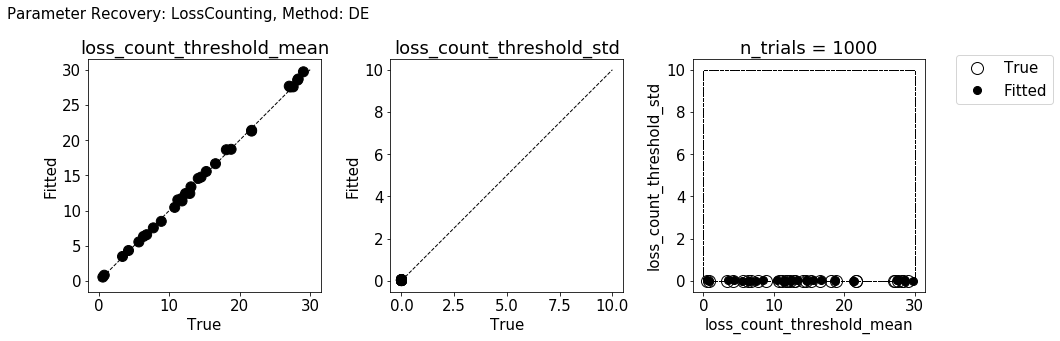

In [3]:
n_trials = 1000

forager = 'LossCounting'
para_names = ['loss_count_threshold_mean','loss_count_threshold_std']
para_bounds = [[0,0],[30,10]]

# Para recovery
true_paras = generate_true_paras([[0,0],[30,0]], n_models = 30, method = 'random_uniform')

fit_para_recovery(forager = forager, 
                  para_names = para_names, para_bounds = para_bounds, 
                  true_paras = true_paras, n_trials = n_trials, 
                  fit_method = 'DE', pool = pool);    


If we allow `loss_count_threshold_std` > 0, we will have huge discrepancy between fitted and true parameters when `loss_count_threshold_std` is large.

Parameter Recovery, LossCounting: 100%|████████████████████████████████████████████████| 25/25 [02:30<00:00,  6.00s/it]


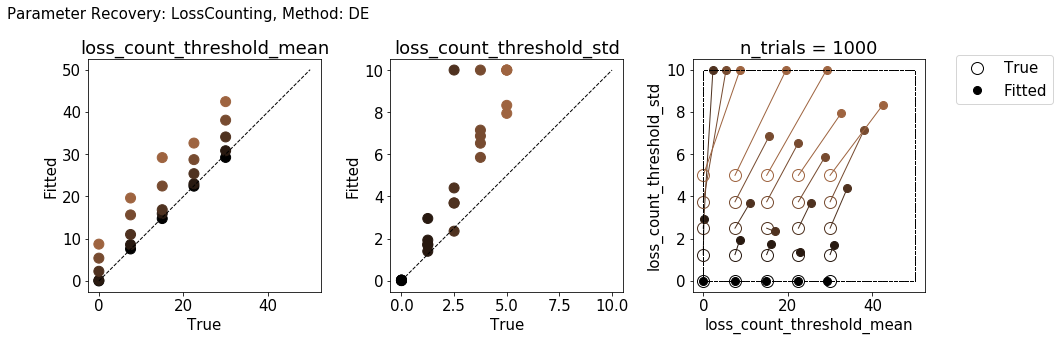

In [4]:
n_trials = 1000

forager = 'LossCounting'
para_names = ['loss_count_threshold_mean','loss_count_threshold_std']
para_bounds = [[0,0],[50,10]]

# Para recovery
true_paras = generate_true_paras([[0,0],[30,5]], n_models = [5,5], method = 'linspace')

fit_para_recovery(forager = forager, 
                  para_names = para_names, para_bounds = para_bounds, 
                  true_paras = true_paras, n_trials = n_trials, 
                  fit_method = 'DE', pool = pool);    

### Likelihood landscape and DE history (Fig.3a in Wilson and Collins 2019)

Likelihood landscape plots show that the huge discrepancy is not due to the fitting *per se*, but due to a systematic bias introduced by the inherent correlation between `loss_count_threshold_mean` and `loss_count_threshold_std`. The ***ridge*** in the landscape indicates a trade-off between the two parameters (see Wilson and Collins 2019). **Importantly, the true value is not even on the ridge!!**

compute_LL_surface: 100%|███████████████████████████████████████████████████████████| 900/900 [00:07<00:00, 114.65it/s]


Fitting using DE, n_x0s = 1, pool = True...


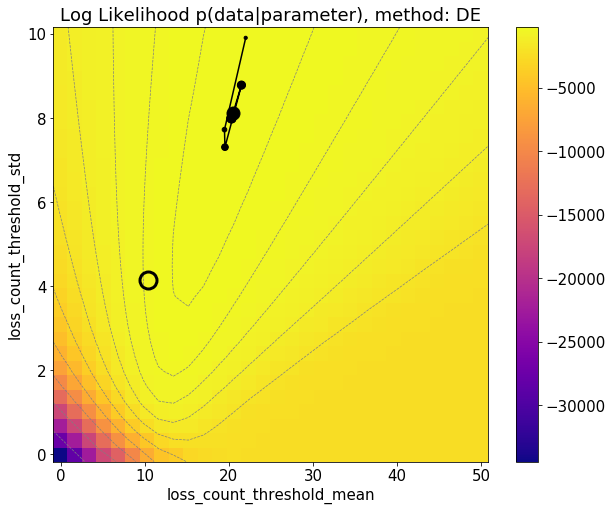

In [5]:
n_trials = 1000
forager = 'LossCounting'
para_names = ['loss_count_threshold_mean','loss_count_threshold_std']
para_bounds = [[0,0],[50,10]]
n_grid = [30,30]
true_para = [10,4]

# LL_surface
compute_LL_surface(forager, para_names, para_bounds, n_grid = n_grid, 
                   true_para = true_para, n_trials = n_trials,
                   fit_method = 'DE', pool = pool);


No such bias when true_std = 0, because the ***ridge*** now becomes a ***peak***.
(also, note how fast `DE` converges! Only one iteration!)

compute_LL_surface: 100%|███████████████████████████████████████████████████████████| 900/900 [00:07<00:00, 114.69it/s]


Fitting using DE, n_x0s = 1, pool = True...


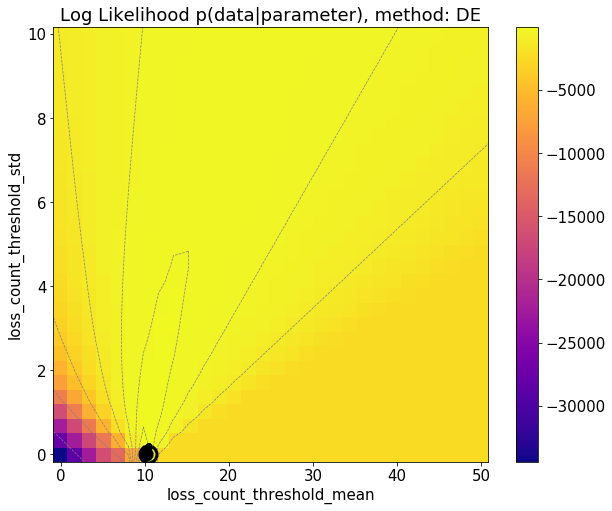

In [4]:
n_trials = 1000
forager = 'LossCounting'
para_names = ['loss_count_threshold_mean','loss_count_threshold_std']
para_bounds = [[0,0],[50,10]]
n_grid = [30,30]
true_para = [10,0]

# LL_surface
compute_LL_surface(forager, para_names, para_bounds, n_grid = n_grid, 
                   true_para = true_para, n_trials = n_trials,
                   fit_method = 'DE', pool = pool);

BTW, here is a cool [demo](https://pablormier.github.io/2017/09/05/a-tutorial-on-differential-evolution-with-python/) of [`differential evolution`](https://www1.icsi.berkeley.edu/~storn/code.html). This problem will drive the following local optimizers CRAZY...
<img src="https://pablormier.github.io/assets/img/de/ackley.gif" />

### Compare global optimizer with local optimizer (with `n_x0s` different initializations)


==> Speed: DE > SLSQP > L-BFGS-B >> TNC >>> trust-constr

#### DE

Parameter Recovery, LossCounting: 100%|████████████████████████████████████████████████| 25/25 [02:32<00:00,  6.11s/it]


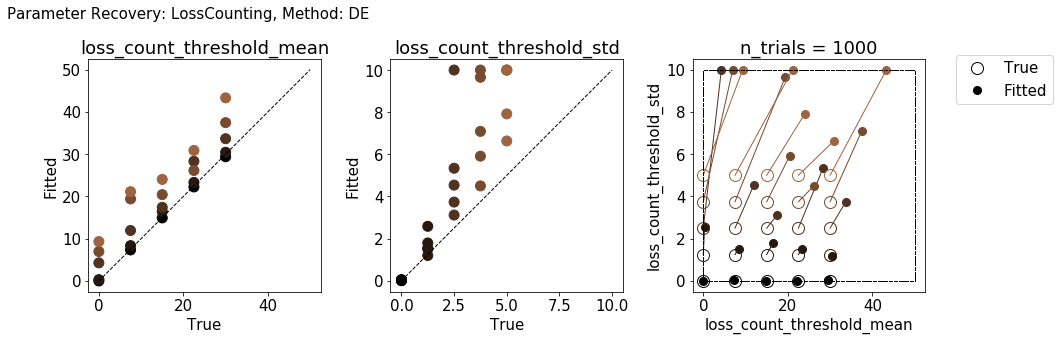

In [7]:
n_trials = 1000

forager = 'LossCounting'
para_names = ['loss_count_threshold_mean','loss_count_threshold_std']
para_bounds = [[0,0],[50,10]]

# Para recovery
true_paras = generate_true_paras([[0,0],[30,5]], n_models = [5,5], method = 'linspace')

fit_para_recovery(forager = forager, 
                  para_names = para_names, para_bounds = para_bounds, 
                  true_paras = true_paras, n_trials = n_trials, 
                  fit_method = 'DE', pool = pool);    

#### L-BFGS-B

`n_x0s` = 1: Lots of local minima!!

Parameter Recovery, LossCounting: 100%|████████████████████████████████████████████████| 25/25 [01:25<00:00,  3.43s/it]


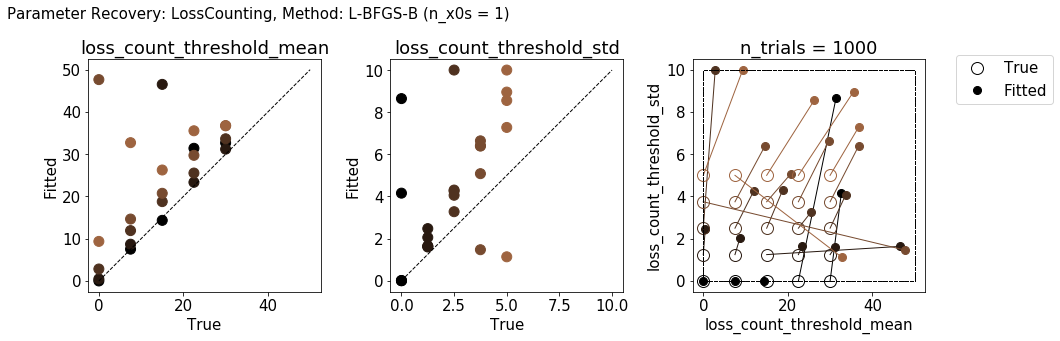

In [2]:
n_trials = 1000

forager = 'LossCounting'
para_names = ['loss_count_threshold_mean','loss_count_threshold_std']
para_bounds = [[0,0],[50,10]]

# Para recovery
true_paras = generate_true_paras([[0,0],[30,5]], n_models = [5,5], method = 'linspace')
fit_para_recovery(forager = forager, 
                  para_names = para_names, para_bounds = para_bounds, 
                  true_paras = true_paras, n_trials = n_trials, 
                  fit_method = 'L-BFGS-B', n_x0s = 1, pool = pool);    

`n_x0s` = 8: no local optima issue! (in parallel)

Parameter Recovery, LossCounting: 100%|████████████████████████████████████████████████| 25/25 [02:53<00:00,  6.95s/it]


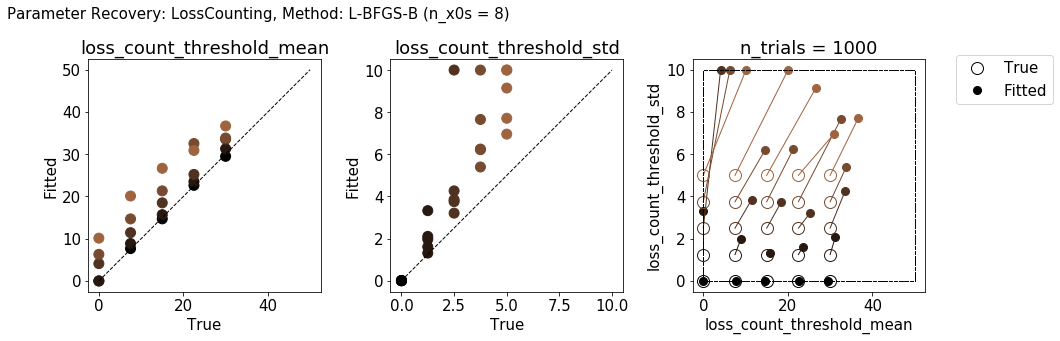

In [3]:
n_trials = 1000

forager = 'LossCounting'
para_names = ['loss_count_threshold_mean','loss_count_threshold_std']
para_bounds = [[0,0],[50,10]]

# Para recovery
true_paras = generate_true_paras([[0,0],[30,5]], n_models = [5,5], method = 'linspace')
fit_para_recovery(forager = forager, 
                  para_names = para_names, para_bounds = para_bounds, 
                  true_paras = true_paras, n_trials = n_trials, 
                  fit_method = 'L-BFGS-B', n_x0s = 8, pool = pool);    

`n_x0s` = 16: very robust, but slow. Not necessary.

Parameter Recovery, LossCounting: 100%|████████████████████████████████████████████████| 25/25 [05:20<00:00, 12.82s/it]


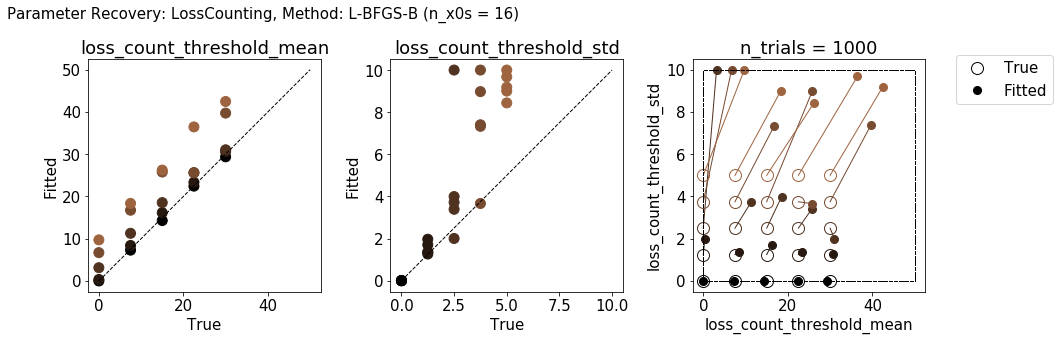

In [4]:
n_trials = 1000

forager = 'LossCounting'
para_names = ['loss_count_threshold_mean','loss_count_threshold_std']
para_bounds = [[0,0],[50,10]]

# Para recovery
true_paras = generate_true_paras([[0,0],[30,5]], n_models = [5,5], method = 'linspace')
fit_para_recovery(forager = forager, 
                  para_names = para_names, para_bounds = para_bounds, 
                  true_paras = true_paras, n_trials = n_trials, 
                  fit_method = 'L-BFGS-B', n_x0s = 16, pool = pool);    

#### SLSQP (seems to be faster than L-BFGS-B?)

Parameter Recovery, LossCounting: 100%|████████████████████████████████████████████████| 25/25 [02:38<00:00,  6.32s/it]


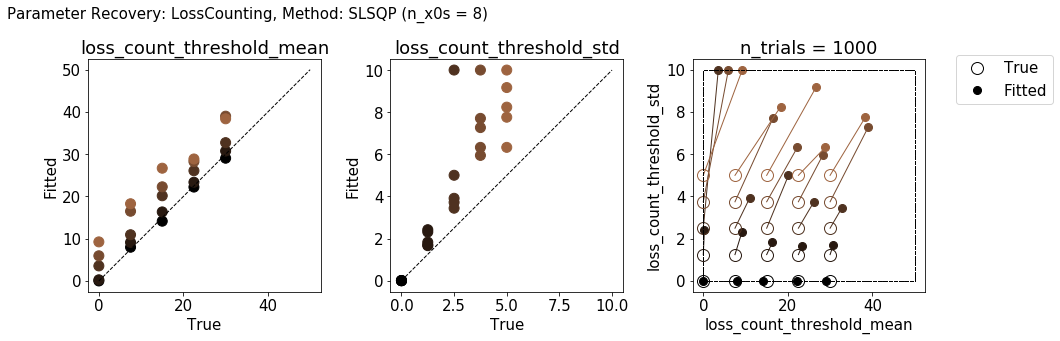

In [5]:
n_trials = 1000

forager = 'LossCounting'
para_names = ['loss_count_threshold_mean','loss_count_threshold_std']
para_bounds = [[0,0],[50,10]]

# Para recovery
true_paras = generate_true_paras([[0,0],[30,5]], n_models = [5,5], method = 'linspace')
fit_para_recovery(forager = forager, 
                  para_names = para_names, para_bounds = para_bounds, 
                  true_paras = true_paras, n_trials = n_trials, 
                  fit_method = 'SLSQP', n_x0s = 8, pool = pool);    

#### ~TNC (too slow!!!)~

Parameter Recovery, LossCounting: 100%|████████████████████████████████████████████████| 25/25 [11:09<00:00, 26.80s/it]


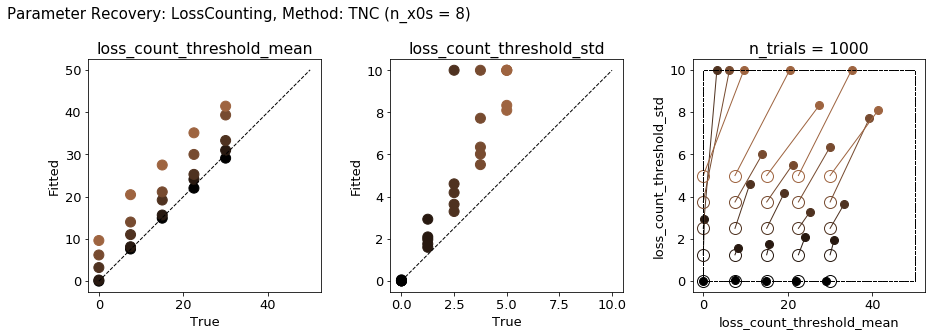

In [3]:
n_trials = 1000

forager = 'LossCounting'
para_names = ['loss_count_threshold_mean','loss_count_threshold_std']
para_bounds = [[0,0],[50,10]]

# Para recovery
true_paras = generate_true_paras([[0,0],[30,5]], n_models = [5,5], method = 'linspace')
fit_para_recovery(forager = forager, 
                  para_names = para_names, para_bounds = para_bounds, 
                  true_paras = true_paras, n_trials = n_trials, 
                  fit_method = 'TNC', n_x0s = 8, pool = pool);    

#### ~trust-constr (toooooooo slow)~

Parameter Recovery, LossCounting: 100%|████████████████████████████████████████████████| 25/25 [09:26<00:00, 22.64s/it]


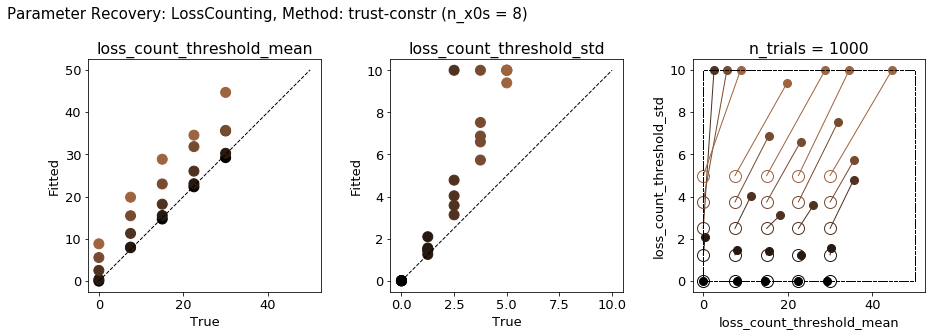

In [4]:
n_trials = 1000

forager = 'LossCounting'
para_names = ['loss_count_threshold_mean','loss_count_threshold_std']
para_bounds = [[0,0],[50,10]]

# Para recovery
true_paras = generate_true_paras([[0,0],[30,5]], n_models = [5,5], method = 'linspace')
fit_para_recovery(forager = forager, 
                  para_names = para_names, para_bounds = para_bounds, 
                  true_paras = true_paras, n_trials = n_trials, 
                  fit_method = 'trust-constr', n_x0s = 8, pool = pool);    

### Multiple initialization on the likelihood landscape

Let's plot multiple histories of local optimizers (should use `pool = ''` because I have difficulty storing the intermediate results in callbacks during parallelizing local optimizers). <br>
**Note the dots on the southeastern plateau. They failed to converge due to bad initializations. Also note how the traces wander on the ridge...**

compute_LL_surface: 100%|███████████████████████████████████████████████████████████| 900/900 [00:07<00:00, 117.70it/s]


Fitting using L-BFGS-B, n_x0s = 8, pool = False...


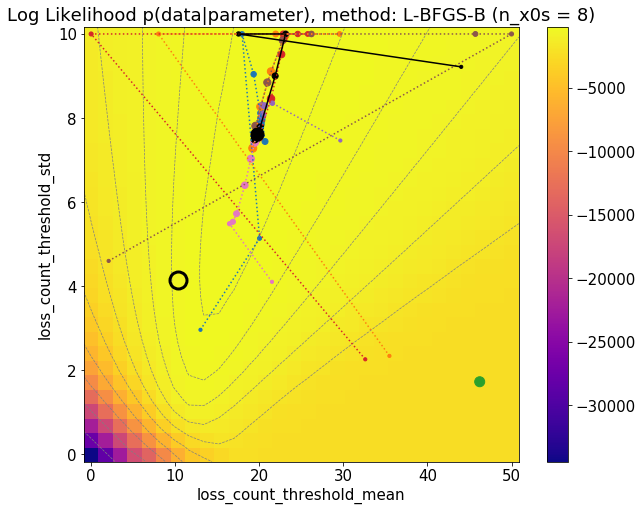

In [10]:
n_trials = 1000
forager = 'LossCounting'
para_names = ['loss_count_threshold_mean','loss_count_threshold_std']
para_bounds = [[0,0],[50,10]]
n_grid = [30,30]
true_para = [10,4]

# LL_surface
compute_LL_surface(forager, para_names, para_bounds, n_grid = n_grid, 
                   true_para = true_para, n_trials = n_trials,
                   fit_method = 'L-BFGS-B', n_x0s = 8, pool = '');


compute_LL_surface: 100%|███████████████████████████████████████████████████████████| 900/900 [00:07<00:00, 114.10it/s]


Fitting using L-BFGS-B, n_x0s = 8, pool = False...


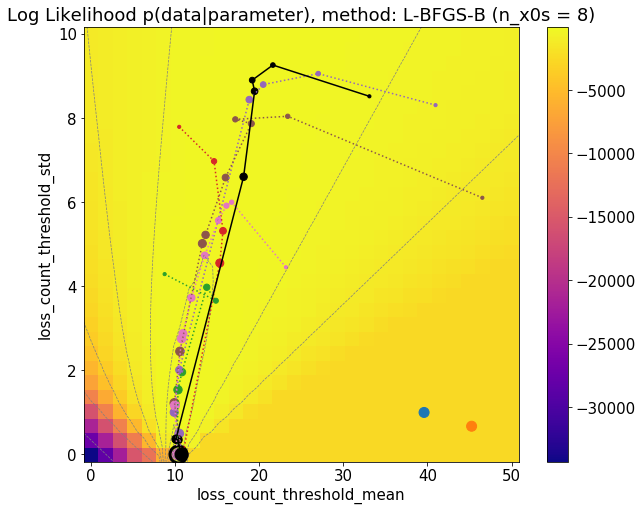

In [2]:
n_trials = 1000
forager = 'LossCounting'
para_names = ['loss_count_threshold_mean','loss_count_threshold_std']
para_bounds = [[0,0],[50,10]]
n_grid = [30,30]
true_para = [10,0]

# LL_surface
compute_LL_surface(forager, para_names, para_bounds, n_grid = n_grid, 
                   true_para = true_para, n_trials = n_trials,
                   fit_method = 'L-BFGS-B', n_x0s = 8, pool = '');


`SLSQP` seems to be faster than `L-BFGS-B` (and also it has a nicer name). Let's see how it converges.<br>
==> More "explorative" than L-B? The traces are crazy; plus, more initializations failed to converge (zigzags even on the x-axis)

compute_LL_surface: 100%|███████████████████████████████████████████████████████████| 900/900 [00:07<00:00, 116.56it/s]


Fitting using SLSQP, n_x0s = 8, pool = False...


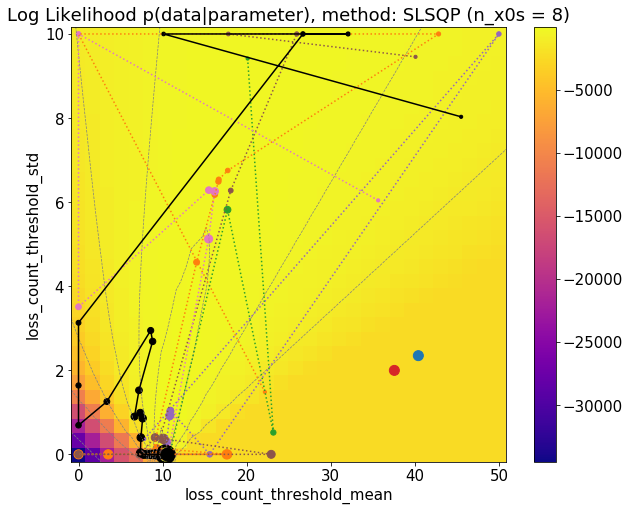

In [3]:
n_trials = 1000
forager = 'LossCounting'
para_names = ['loss_count_threshold_mean','loss_count_threshold_std']
para_bounds = [[0,0],[50,10]]
n_grid = [30,30]
true_para = [10,0]

# LL_surface
compute_LL_surface(forager, para_names, para_bounds, n_grid = n_grid, 
                   true_para = true_para, n_trials = n_trials,
                   fit_method = 'SLSQP', n_x0s = 8, pool = '');


## Intermediate Summary (1)

1. `DE` is the first choice
2. `L-BFGS-B` is the second choice, with the number of initializations at least 8.
3. `SLSQP` is a potential choice. Maybe exploration is desirable in some cases. Who knows.
4. Case-by-case fine tuning of algorithm parameters (mutation, etc.) may be beneficial
5. Plotting likelihood landscape by brutal force is quite informative. It can give us confidence intervals. We can follow this:<br>
    (1) Find maximal likelihood using `DE` etc.<br>
    (2) Plot likelihood landscape for any 2 (or 3) parameters of interest around the global optimal, while keeping other parameters fixed
6. Pay attention to correlations between parameters (indicated by ***ridges*** in the likelihood landscape). This will definitely limit the accuracy of parameter recovery, but hopefully it won't change the results of model recovery (since the maximal likelihood is even larger than the likelihood of the true value in the above case)<br>

I will redo these things occasionally for other models. 

### 1.2 LNP-foragers (based on Corrado 2005)